In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 40,20

sns.set_theme(style="darkgrid")

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [ ]:
netflix_df = pd.read_csv("netflix_titles.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


List of Movie and TV Show titles and descriptions

In [ ]:
netflix_df[["title", "description"]]

,title,description
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...
...,...,...
7782,Zozo,When Lebanon's Civil War deprives Zozo of his ...
7783,Zubaan,A scrappy but poor boy worms his way into a ty...
7784,Zulu Man in Japan,"In this documentary, South African rapper Nast..."
7785,Zumbo's Just Desserts,Dessert wizard Adriano Zumbo looks for the nex...


Movies released in 2020

In [ ]:
netflix_df[(netflix_df["release_year"] == 2020) & (netflix_df["type"] == "Movie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ..."
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
32,s33,Movie,#FriendButMarried 2,Rako Prijanto,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Indonesia,"June 28, 2020",2020,TV-G,104 min,"Dramas, International Movies, Romantic Movies",As Ayu and Ditto finally transition from best ...
43,s44,Movie,Òlòtūré,Kenneth Gyang,"Beverly Osu, Sharon Ooja, Omowunmi Dada, Pearl...",Nigeria,"October 2, 2020",2020,TV-MA,107 min,"Dramas, International Movies","In Lagos, a journalist goes undercover as a pr..."
57,s58,Movie,100% Halal,Jastis Arimba,"Anisa Rahma, Ariyo Wahab, Anandito Dwis, Fitri...",Indonesia,"January 7, 2021",2020,TV-14,101 min,"Dramas, International Movies","After high school, a young woman marries the m..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7710,s7711,Movie,"Yes, God, Yes",Karen Maine,"Natalia Dyer, Timothy Simons, Wolfgang Novogra...",United States,"October 22, 2020",2020,R,78 min,"Comedies, Dramas, Independent Movies",A devoutly religious teen grapples with her ow...
7722,s7723,Movie,You Are My Home,Amanda Raymond,"Alyssa Milano, Angel Parker, Cristián de la Fu...",United States,"December 4, 2020",2020,TV-PG,93 min,"Children & Family Movies, Dramas","After becoming separated from her family, a yo..."
7734,s7735,Movie,You've Got This,Salvador Espinosa,"Mauricio Ochmann, Esmeralda Pimentel, Matteo G...",Mexico,"October 2, 2020",2020,TV-MA,112 min,"Comedies, International Movies, Romantic Movies",An ad creative and a successful exec have a gr...
7741,s7742,Movie,Your Name Engraved Herein,Liu Kuang-hui,"Edward Chen, Tseng Ching-hua, Leon Dai, Jason ...",Taiwan,"December 23, 2020",2020,TV-MA,115 min,"Dramas, International Movies, LGBTQ Movies","In 1987, as martial law ends in Taiwan, Jia-ha..."


What is the country with the most released Movies?

In [ ]:
movies_df = netflix_df[netflix_df["type"] == "Movie"]
mode_df = movies_df.mode().dropna()
mode_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s10,Movie,#Alive,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",2017.0,TV-MA,90 min,Documentaries,A surly septuagenarian gets another chance at ...


In [ ]:
mode_df["country"]

0    United States
Name: country, dtype: object

Unsurprinsingly the country with the most number of movies is `United States`.

What can we tell about the release year?

In [ ]:
release_year_series = movies_df["release_year"]
avg_release_year = int(np.mean(release_year_series))
std_release_year = np.std(release_year_series)
range_release_year = np.ptp(release_year_series)

print("Release Year")
print(f"Average: {avg_release_year}")
print(f"Range: {range_release_year}")
print(f"STD: {std_release_year}")

Release Year
Average: 2012
Range: 79
STD: 9.66238344603143


The range of `release_year` shows how there has been shows since the 40' and 50', but there is a significant increase of productions in the past 15 years or so.

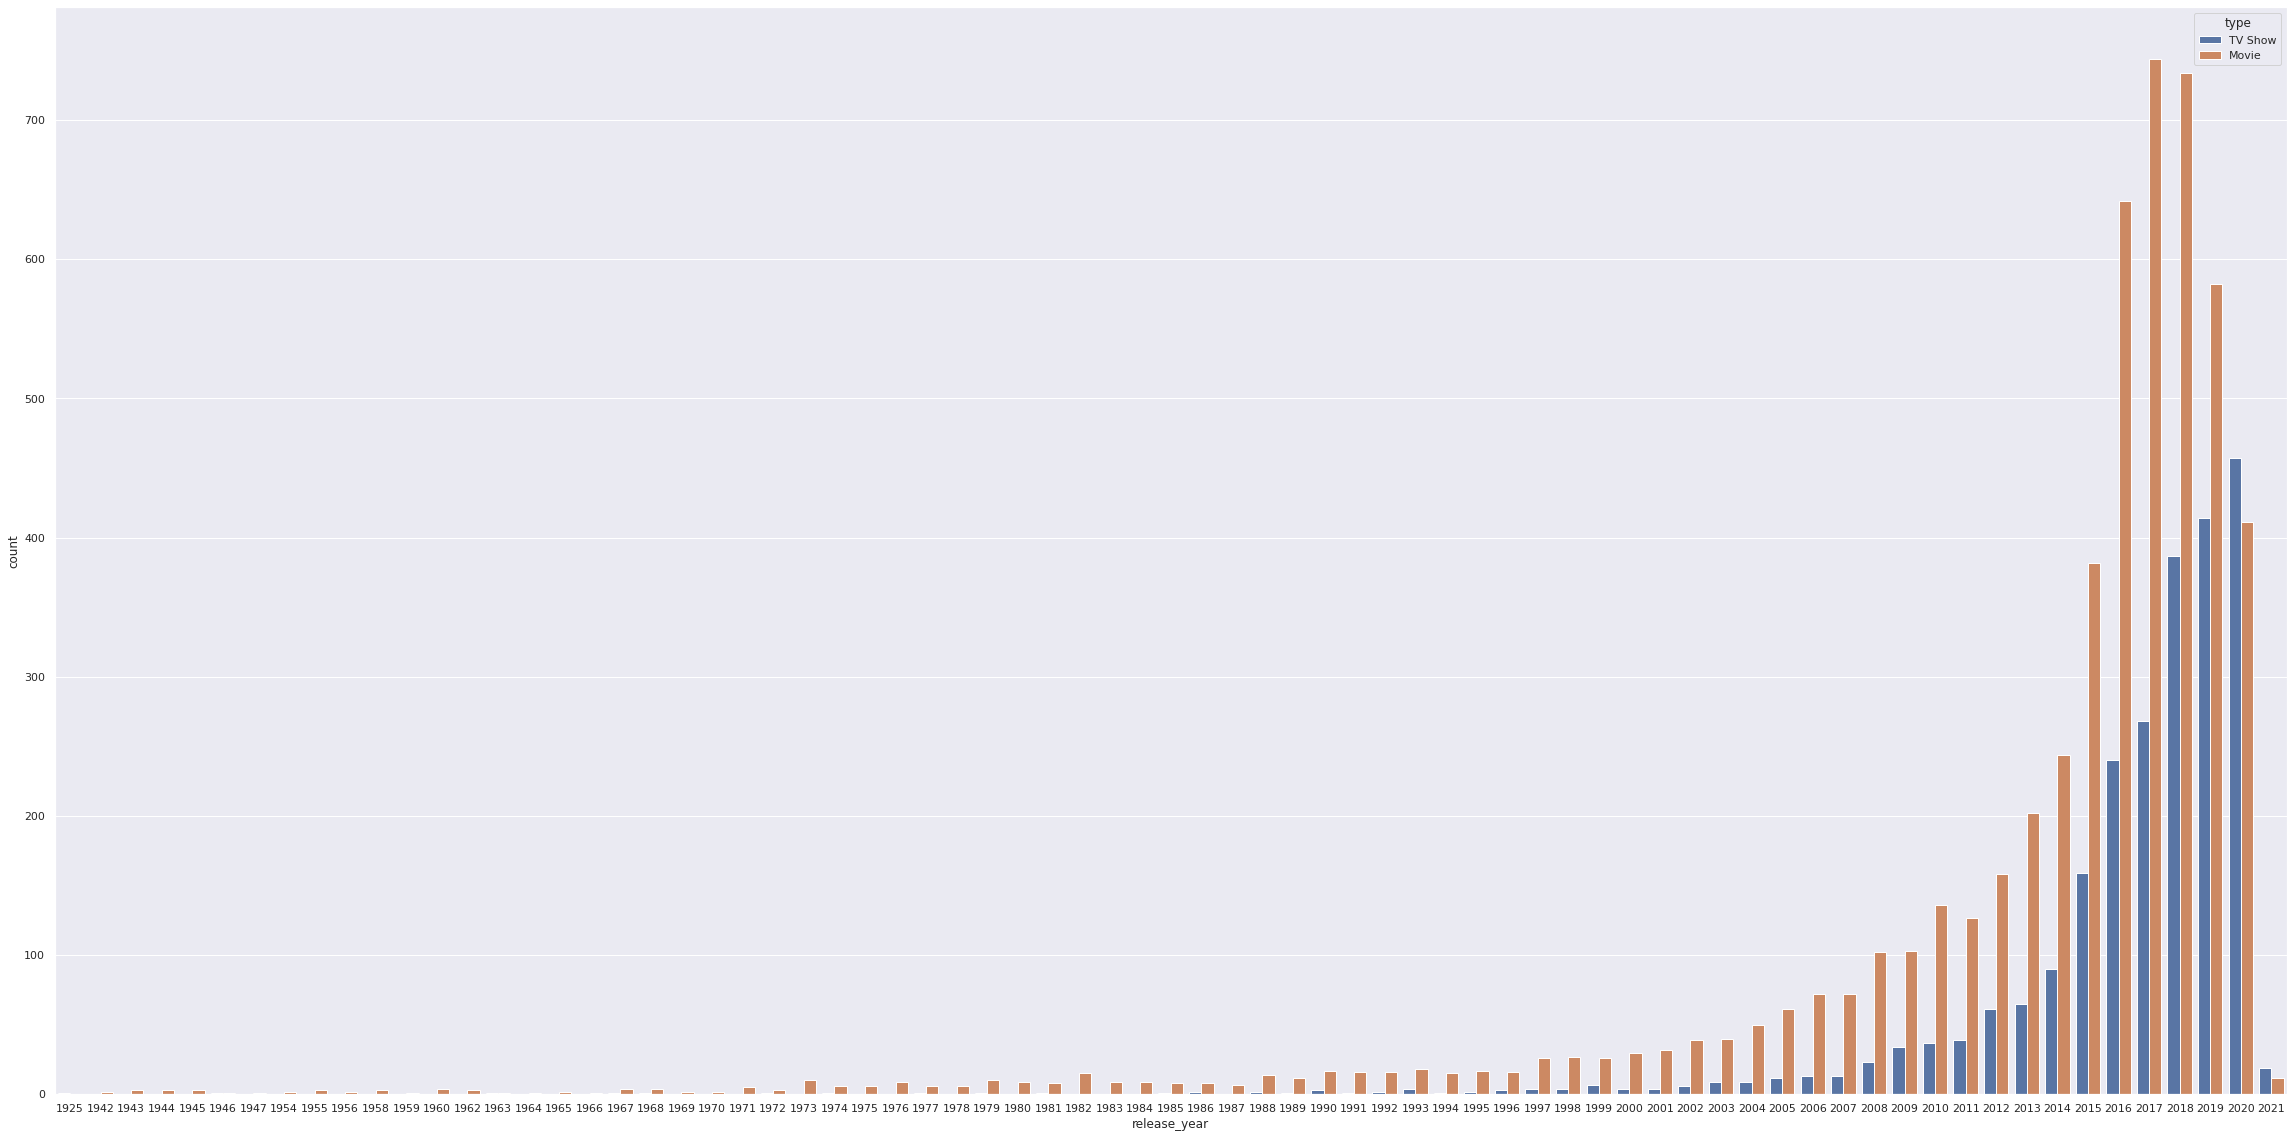

In [ ]:
sns.countplot(x="release_year", hue="type", data=netflix_df)

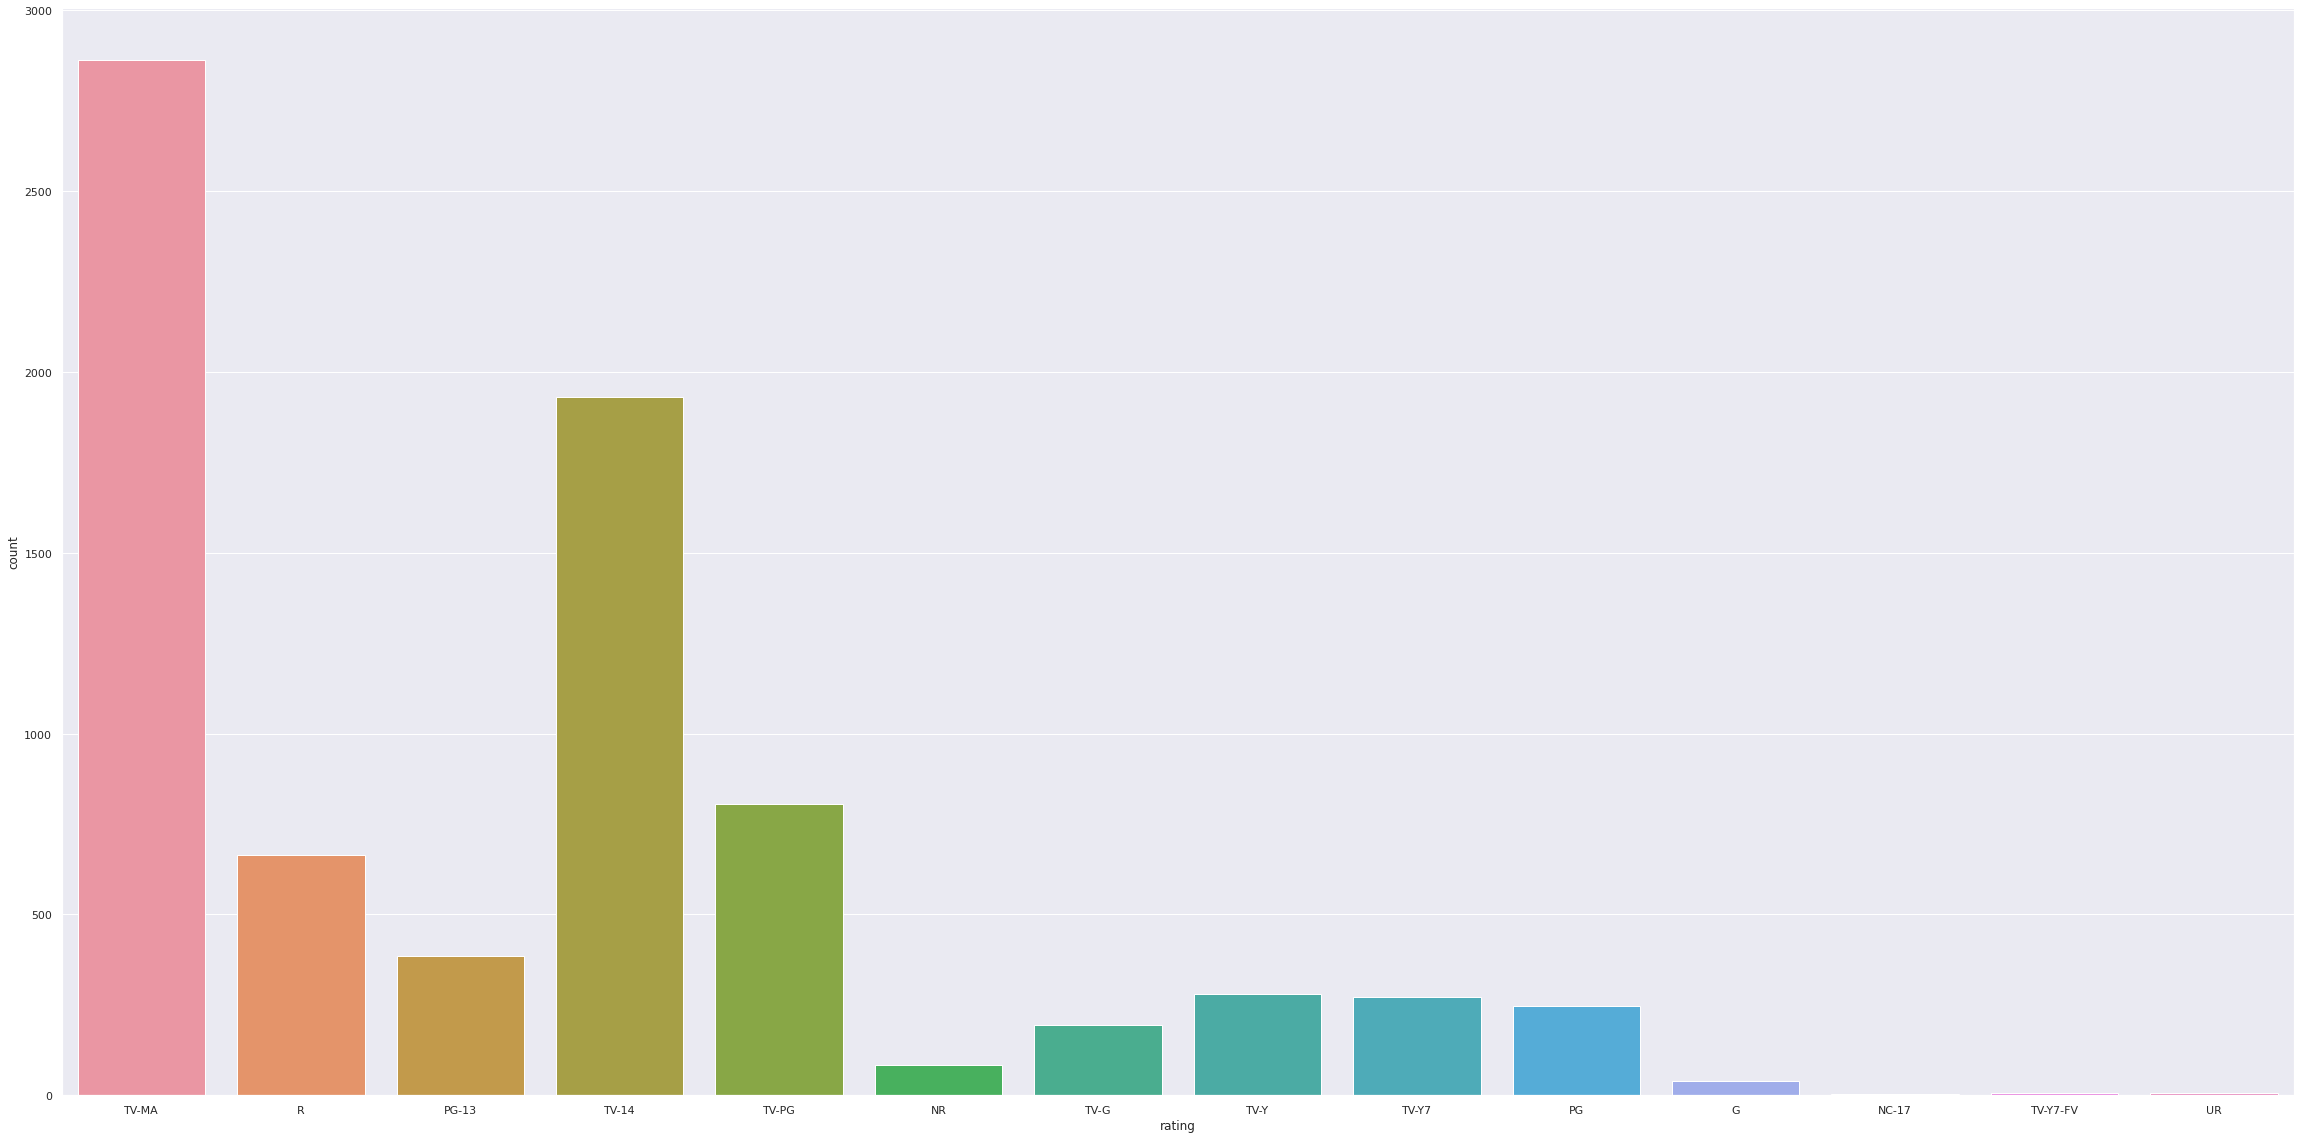

In [ ]:
sns.countplot(x="rating", data=netflix_df)

This countplot shows the validation that the majority of shows fall under parental and child friendly ratings.

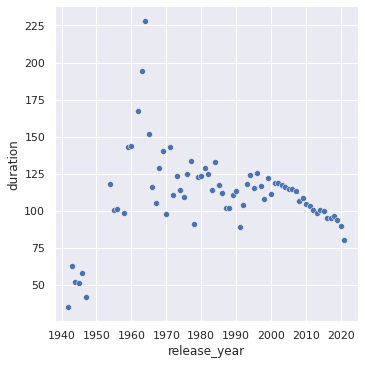

In [ ]:
def duration_formatter(data):
  if type(data) == int:
    return data

  forbidden_chars = [" ", "m", "i", "n", "s"]
  for char in forbidden_chars:
    data = data.replace(char, "")

  return int(data)

movies_df.dropna()

# Comment this line of code, after first run
# movies_df["duration"] = movies_df["duration"].apply(duration_formatter)

duration_df = movies_df.groupby("release_year").mean()
duration_df = duration_df.reset_index()
duration_df

sns.relplot(x="release_year", y="duration", data=duration_df)


Here, I'm trying to plot the average duration of a movie per year. There's a couple outliers from the 70's that throw off the chart. 

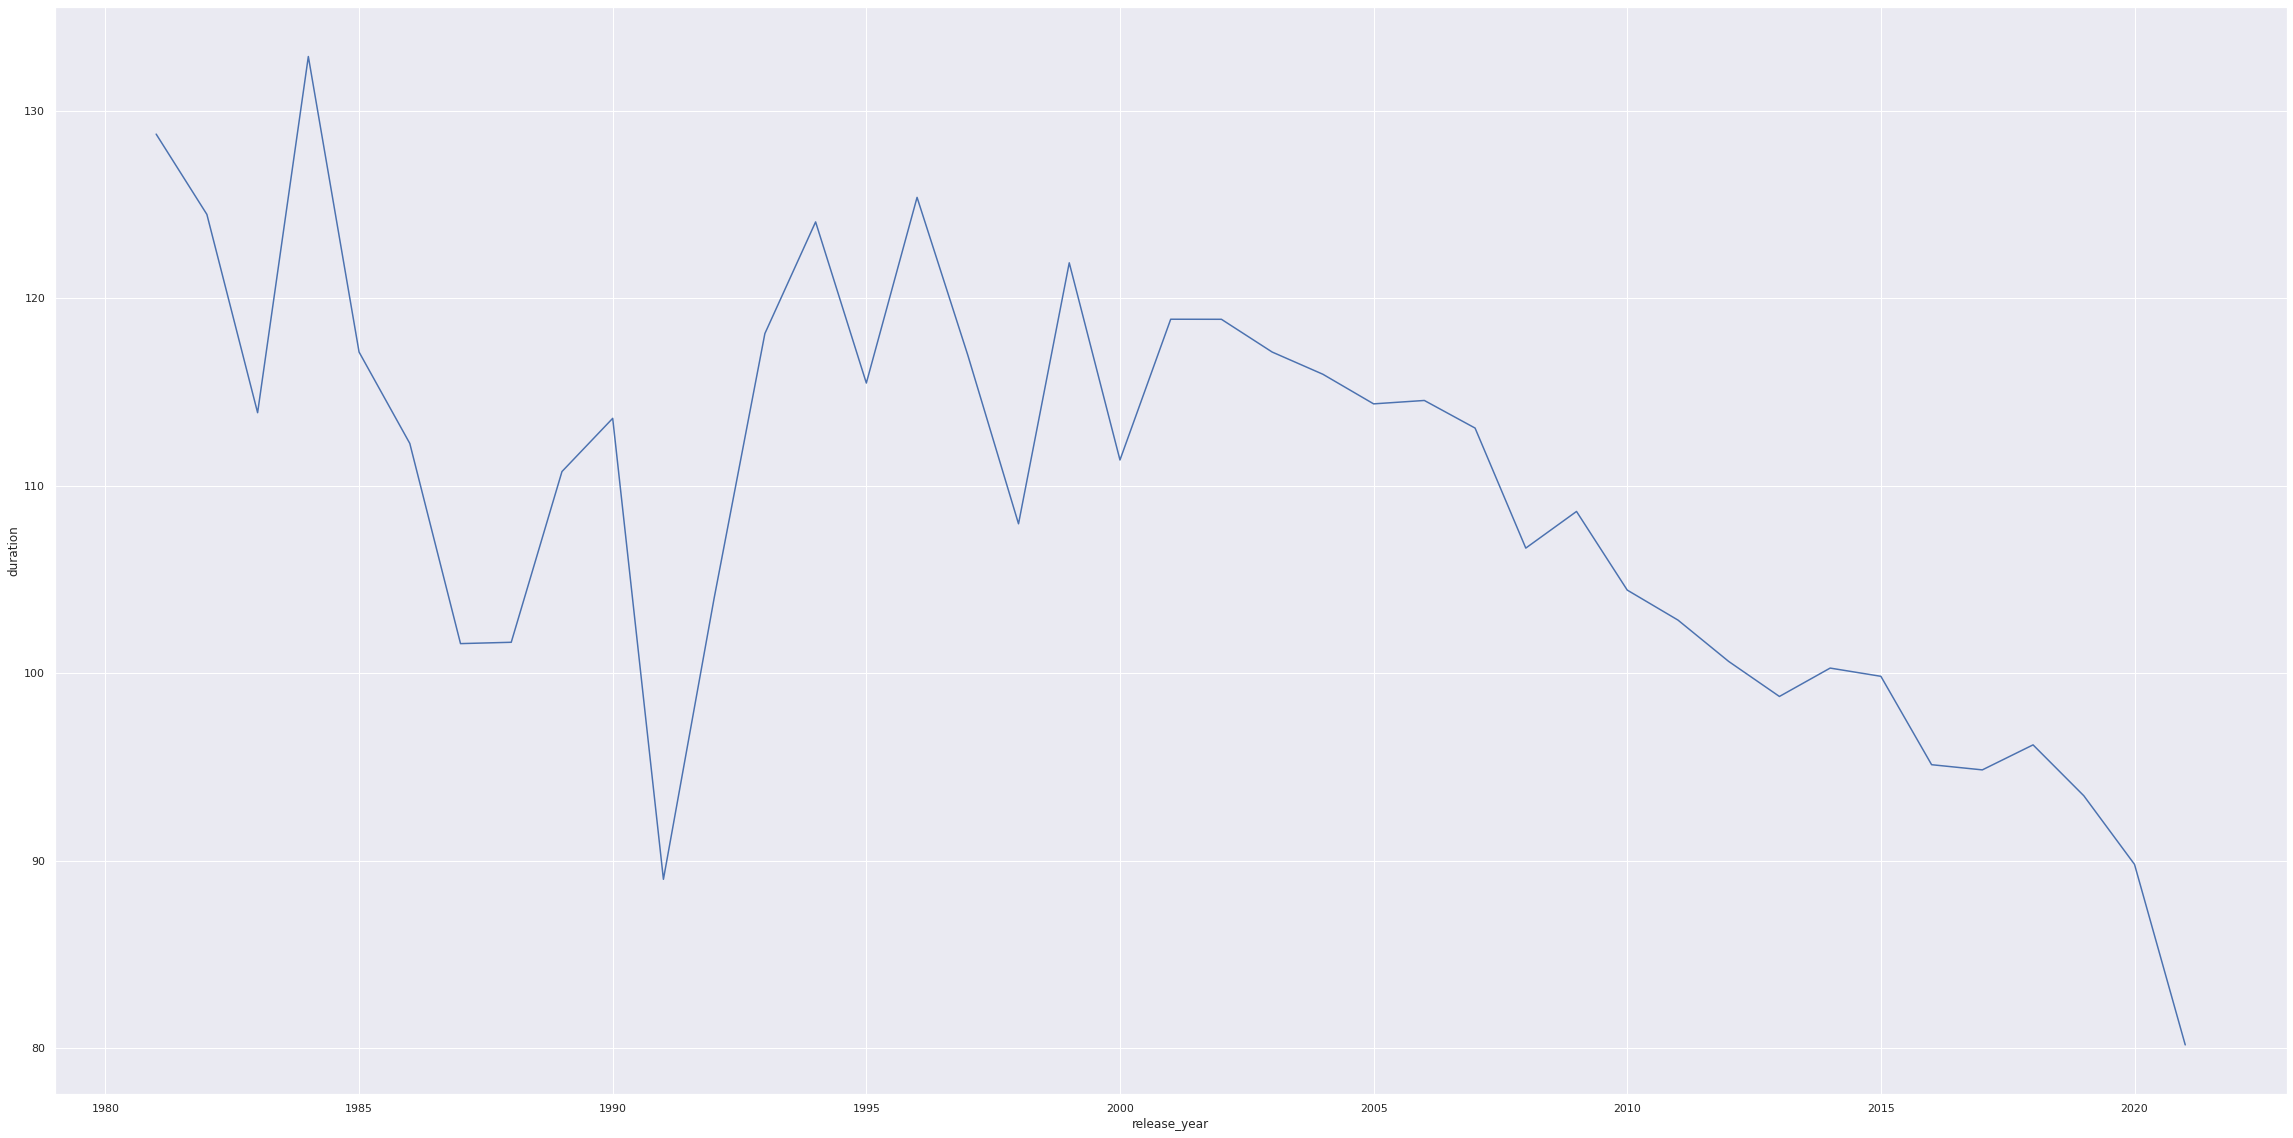

In [145]:
duration_df = duration_df[duration_df["release_year"] > 1980]
sns.lineplot(x="release_year", y="duration", data=duration_df)

Plotting the duration of movies from the past 40 years shows how there is a general trend of shorter movies. 